<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Quantum_Hello_World_Qiskit_IBM_Provider_mkbahk_20241007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m pip install qiskit[visualization]==1.0.2
!python3 -m pip install qiskit-ibm-provider==0.11.0
!python3 -m pip install qiskit-aer==0.14.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 2.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=15270b609ceec95a408909e761b9172124a66c5640e86b02035300a915d341bb
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# 참조: https://github.com/Qiskit/qiskit-ibm-provider/blob/main/docs/tutorials/1_the_ibm_quantum_account.ipynb
# IBMQ Cloud 서비스 사용하기 위한 준비
from qiskit_ibm_provider import IBMProvider

# IBM  Provider에 등록된 계정 정보를 입력합니다.
IBMProvider.save_account(token='여기에 API-Key 입력',overwrite=True)

# IBM Provider로 접속합니다.
ibm_provider = IBMProvider()

# 양자회로를 수행한 양자컴퓨터 백엔드 리스트 출력
#print(ibm_provider.backends())
print("Available backends:")

for backend in ibm_provider.backends():
  print(backend.name)
###for

<ipython-input-2-84dad0d9d540>:3: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider


Available backends:
ibm_brisbane
ibm_sherbrooke
ibm_kyiv


In [3]:
# Qiskit Local Simulator 사용하기 위한 준비
from qiskit_aer import Aer

In [4]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)

circuit.draw('mpl')
circuit.measure_all()

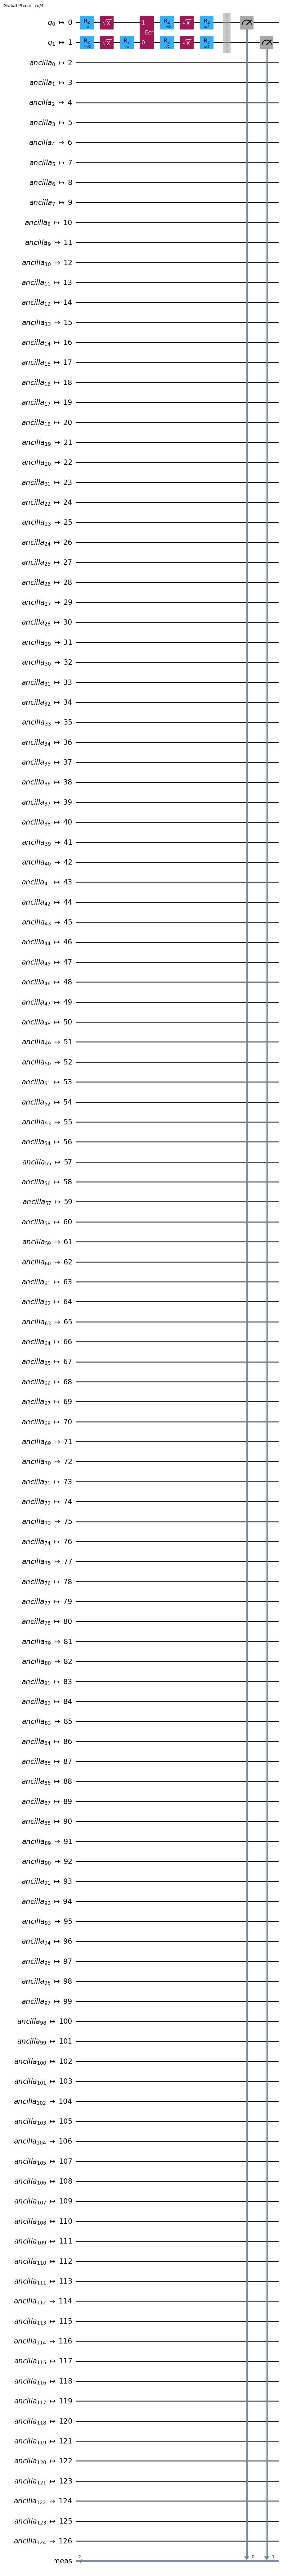

In [9]:
#여러 장치들에게 선택적으로 수행시키기 위한 준비
from qiskit.compiler import transpile, assemble
backend = Aer.get_backend('qasm_simulator')  #Local Qiskit Aer 시뮬레이터 사용
#backend = ibm_provider.get_backend('ibm_brisbane')
trans_qc = transpile(circuit, backend)
trans_qc.draw('mpl')

In [10]:
from qiskit.providers.jobstatus import JobStatus
import time

job = backend.run(trans_qc, shots=1024)

print("Job ID is", job.job_id(),"\n")

# 제출된 잡에 대한 실행 상태 확인
while job.status() is not JobStatus.DONE:
	print("Job status is", job.status() )
	time.sleep(2)
###while


print("Job status is", job.status() )

# 결과 출력
counts = job.result().get_counts()
print(counts)

Job ID is cw1m84rjz3x0008j7wg0 

Job status is JobStatus.QUEUED
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job status is JobStatus.RUNNING
Job stat

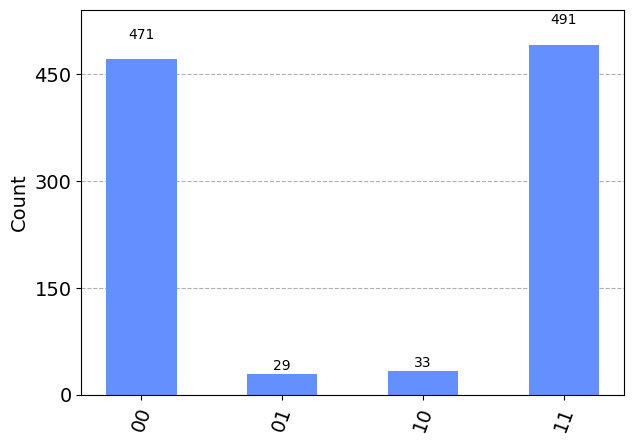

In [11]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)

In [8]:
import qiskit.utils
qiskit.utils.local_hardware_info()

{'python_compiler': 'GCC 11.4.0',
 'python_build': 'main, Sep 11 2024 15:47:36',
 'python_version': '3.10.12',
 'os': 'Linux',
 'cpus': 1}